In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Load the dataset
df = pd.read_csv('loan_approval_dataset.csv')

print('Dataset loaded successfully.')

Dataset loaded successfully.


In [37]:
print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (4269, 13)


In [38]:
print(df.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [39]:
print('Missing values in each column:\
', df.isnull().sum())

Missing values in each column: loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [40]:
print('Summary statistics of numeric columns:\
', df.describe())

Summary statistics of numeric columns:            loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000

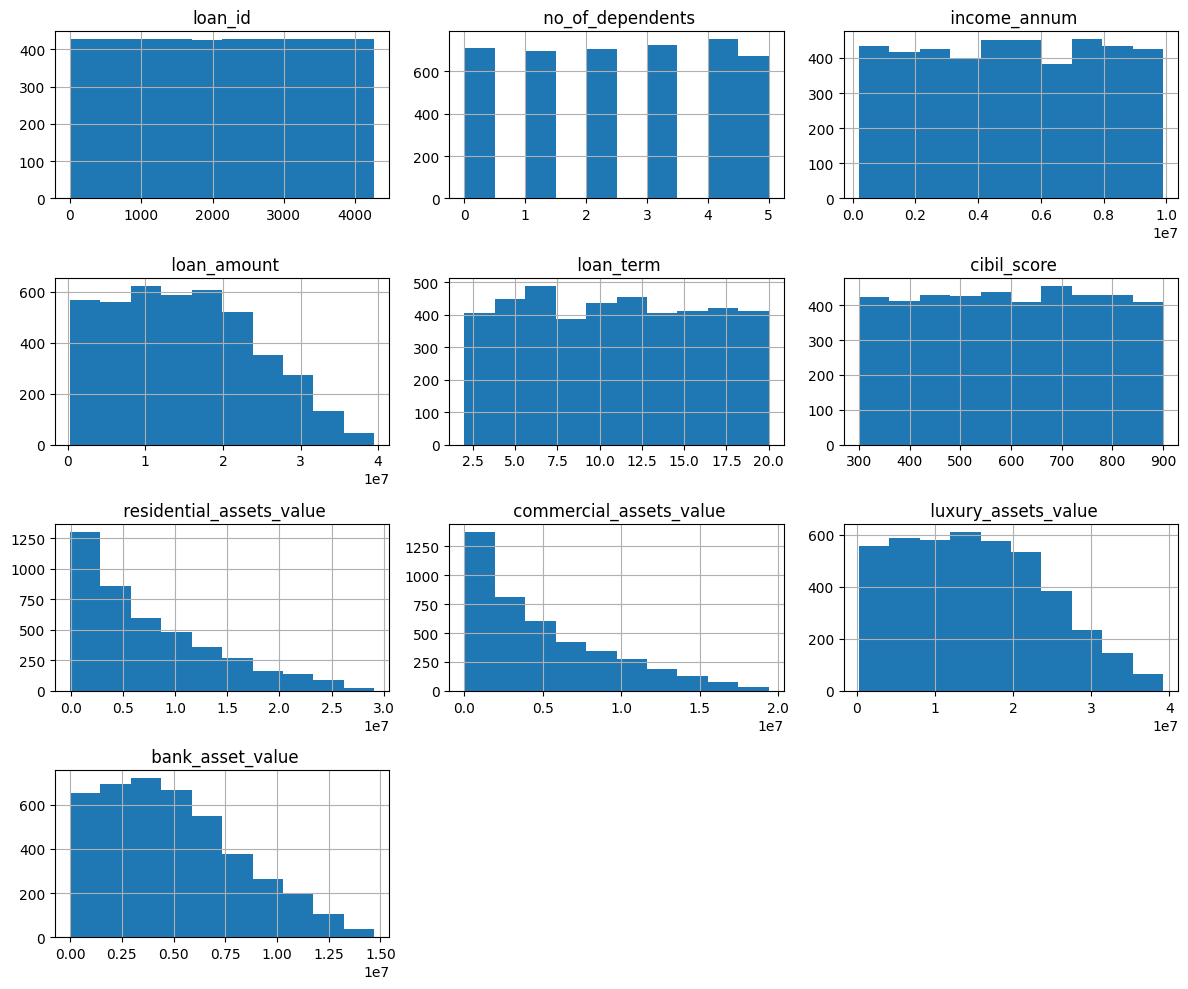

In [41]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(12,10))
plt.tight_layout()
plt.show()

In [42]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f'\
Unique values and counts for {col}:\
', df[col].value_counts())

Unique values and counts for  education:  education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64
Unique values and counts for  self_employed:  self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64
Unique values and counts for  loan_status:  loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64


In [43]:
# Remove leading spaces from column names
df.columns = [col.strip() for col in df.columns]

print('Data type of income_annum column:', df['income_annum'].dtype)

df['income_annum'] = pd.to_numeric(df['income_annum'], errors='coerce')

print('\
Data type after conversion:', df['income_annum'].dtype)

print('\
Number of missing values after conversion:', df['income_annum'].isnull().sum())

Data type of income_annum column: int64
Data type after conversion: int64
Number of missing values after conversion: 0


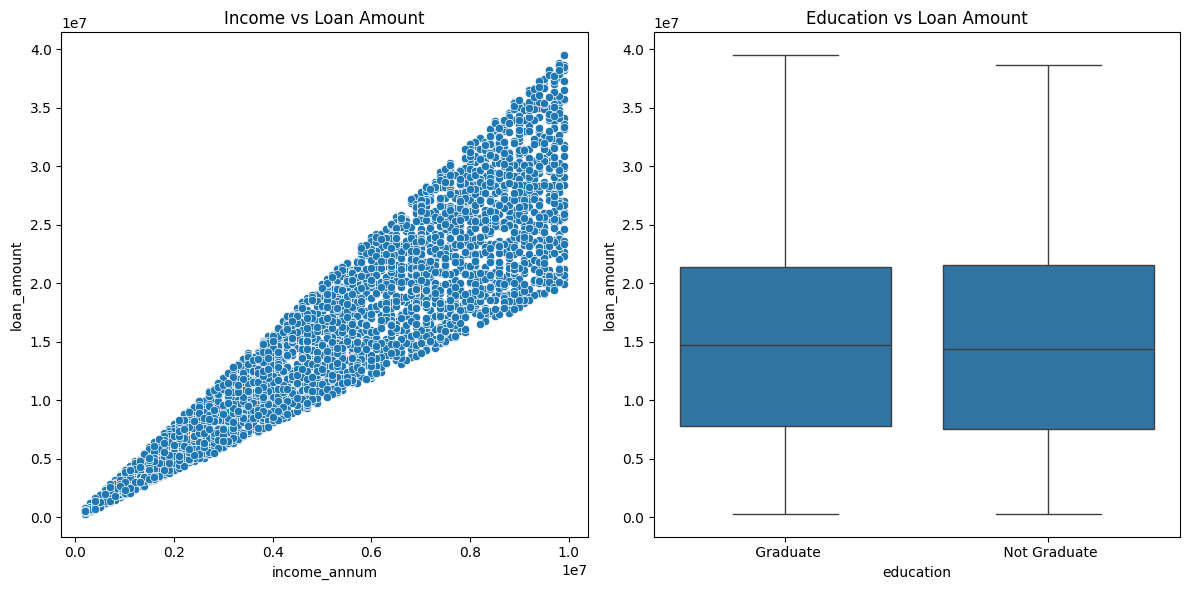

In [44]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='income_annum', y='loan_amount')
plt.title('Income vs Loan Amount')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='education', y='loan_amount')
plt.title('Education vs Loan Amount')

plt.tight_layout()

plt.show()

In [45]:

# Select the categorical columns
categorical_cols = ['education', 'self_employed', 'loan_status']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols)

print('Encoded DataFrame:')
print(df.head())

print('\
Shape of the encoded DataFrame:', df.shape)

Encoded DataFrame:
   loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
0        1                 2       9600000     29900000         12   
1        2                 0       4100000     12200000          8   
2        3                 3       9100000     29700000         20   
3        4                 3       8200000     30700000          8   
4        5                 5       9800000     24200000         20   

   cibil_score  residential_assets_value  commercial_assets_value  \
0          778                   2400000                 17600000   
1          417                   2700000                  2200000   
2          506                   7100000                  4500000   
3          467                  18200000                  3300000   
4          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  education_ Graduate  \
0             22700000           8000000                 True   
1              

In [46]:

# Select the numeric columns
numeric_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print('Scaled numeric columns:')
print(df[numeric_cols].head())

Scaled numeric columns:
   no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0               0.4      0.969072     0.755102   0.555556     0.796667   
1               0.0      0.402062     0.303571   0.333333     0.195000   
2               0.6      0.917526     0.750000   1.000000     0.343333   
3               0.6      0.824742     0.775510   0.333333     0.278333   
4               1.0      0.989691     0.609694   1.000000     0.136667   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                  0.085616                 0.907216             0.575835   
1                  0.095890                 0.113402             0.218509   
2                  0.246575                 0.231959             0.848329   
3                  0.626712                 0.170103             0.591260   
4                  0.428082                 0.422680             0.748072   

   bank_asset_value  
0          0.544218  
1          0.224490  
2 

In [47]:
# Split the data into features and target
X = df.drop(['loan_status_ Approved', 'loan_status_ Rejected'], axis=1)
y = df['loan_status_ Approved']

print('Shape of features (X):', X.shape)
print('Shape of target variable (y):', y.shape)

Shape of features (X): (4269, 14)
Shape of target variable (y): (4269,)


In [48]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of training features (X_train):', X_train.shape)
print('Shape of training target (y_train):', y_train.shape)
print('Shape of testing features (X_test):', X_test.shape)
print('Shape of testing target (y_test):', y_test.shape)

Shape of training features (X_train): (3415, 14)
Shape of training target (y_train): (3415,)
Shape of testing features (X_test): (854, 14)
Shape of testing target (y_test): (854,)


In [49]:

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the testing data
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Display results
print('Accuracy of Logistic Regression:', accuracy)
print('Classification Report:\
', class_report)

Accuracy of Logistic Regression: 0.9121779859484778
Classification Report:               precision    recall  f1-score   support

       False       0.88      0.89      0.88       318
        True       0.93      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:


# Initialize models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

# Train and predict with each model
models = {'Logistic Regression': log_reg, 'Decision Tree': decision_tree, 'Random Forest': random_forest, 'SVM': svm}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Classification Report': class_report}

# Display results
for model_name, metrics in results.items():
    print(f'\
Model: {model_name}')
    print('Accuracy:', metrics['Accuracy'])
    print('Classification Report:\
', metrics['Classification Report'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.9121779859484778
Classification Report:               precision    recall  f1-score   support

       False       0.88      0.89      0.88       318
        True       0.93      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854

Model: Decision Tree
Accuracy: 0.9742388758782201
Classification Report:               precision    recall  f1-score   support

       False       0.97      0.97      0.97       318
        True       0.98      0.98      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

Model: Random Forest
Accuracy: 0.9730679156908665
Classification Report:               precision    recall  f1-score   support

       False       0.97      0.96      0.96       318
        True

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


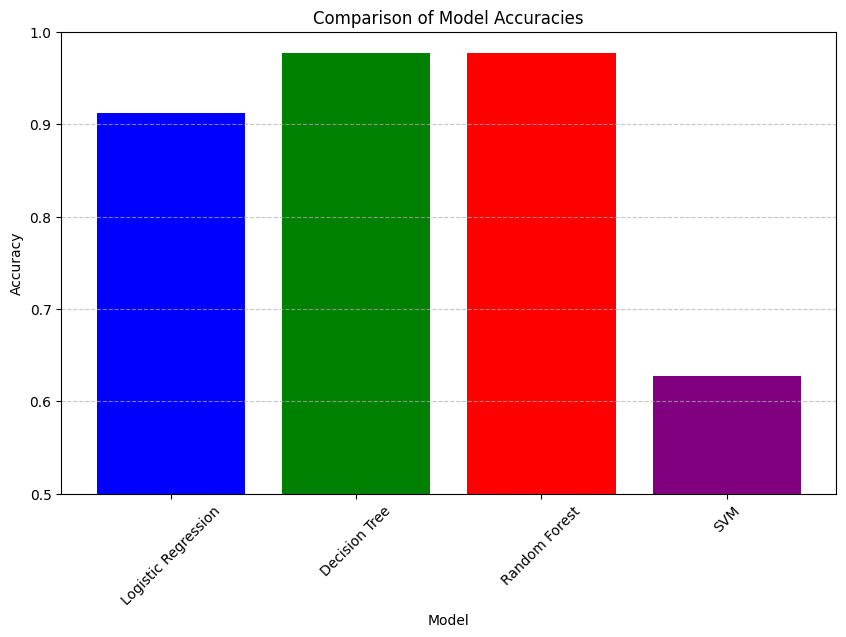

In [51]:

# Model names and their accuracies
df_models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [0.9122, 0.9766, 0.9766, 0.6276]
})

# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(df_models['Model'], df_models['Accuracy'], color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.5, 1.0)  # Set the limits for the Y axis
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

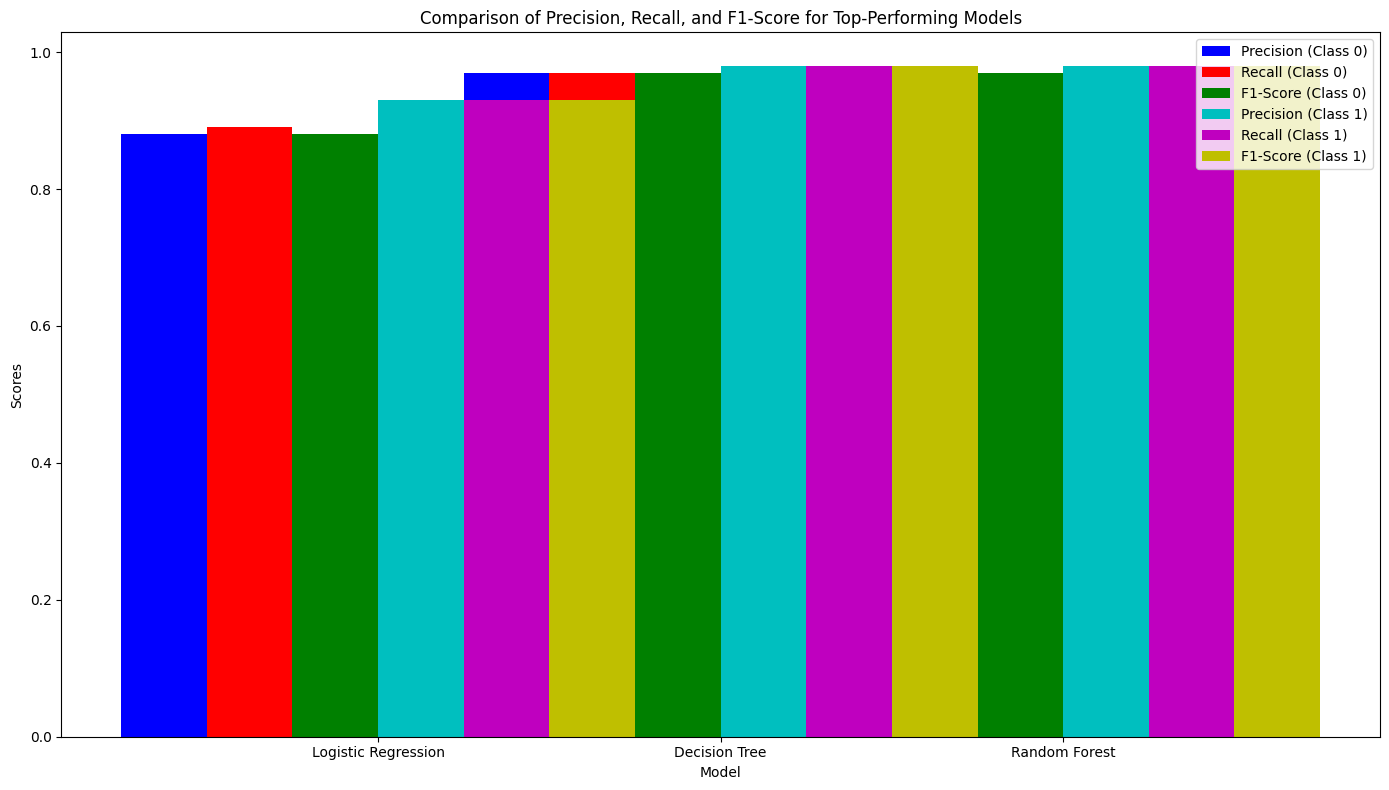

In [52]:

# Data for plotting
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
precision_0 = [0.88, 0.97, 0.97]  # Precision for class 0
recall_0 = [0.89, 0.97, 0.97]      # Recall for class 0
f1_score_0 = [0.88, 0.97, 0.97]   # F1-score for class 0
precision_1 = [0.93, 0.98, 0.98]  # Precision for class 1
recall_1 = [0.93, 0.98, 0.98]      # Recall for class 1
f1_score_1 = [0.93, 0.98, 0.98]   # F1-score for class 1

bar_width = 0.25
index = np.arange(len(models))

# Plotting
plt.figure(figsize=(14, 8), facecolor='white')
plt.bar(index, precision_0, bar_width, label='Precision (Class 0)', color='b')
plt.bar(index + bar_width, recall_0, bar_width, label='Recall (Class 0)', color='r')
plt.bar(index + 2*bar_width, f1_score_0, bar_width, label='F1-Score (Class 0)', color='g')

plt.bar(index + 3*bar_width, precision_1, bar_width, label='Precision (Class 1)', color='c')
plt.bar(index + 4*bar_width, recall_1, bar_width, label='Recall (Class 1)', color='m')
plt.bar(index + 5*bar_width, f1_score_1, bar_width, label='F1-Score (Class 1)', color='y')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Precision, Recall, and F1-Score for Top-Performing Models')
plt.xticks(index + 2.5*bar_width, models)
plt.legend()
plt.tight_layout()
plt.show()